In [30]:
from matplotlib import pyplot as plt
import numpy as np
import h5py
import cv2 
import glob

def load_hdf5(infile,key):
    with h5py.File(infile,"r") as f:#"with" close the file after its nested commands
        return f[key][()]

img_masks_n = 10 #load first 10 images and their masks
dataset_path = "D:/Datasets/Landslide4Sense/TrainData"
imgfile_list = [ f"{dataset_path}/img/image_{i}.h5" for i in range(1,img_masks_n+1) ]
maskfile_list = [ f"{dataset_path}/mask/mask_{i}.h5" for i in range(1,img_masks_n+1) ]

img_list = [load_hdf5(i,"img") for i in imgfile_list]
img_list = np.array(img_list)
mask_list = [load_hdf5(i,"mask") for i in maskfile_list]
mask_list = np.array(mask_list)
print(img_list.shape)
print(mask_list.shape)

(10, 128, 128, 14)
(10, 128, 128)


# Description

Each image patch is a composite of **14 bands** that include:
multi-spectral data from Sentinel-2 (band 1 to band 12) as well as slope and DEM data from ALOS PALSAR (bands 13
and 14). All bands in the dataset are resized to the resolution of 10 meters per pixel.
The image patches have the size of 128 x 128 pixels and are labeled pixel-wise.

First Image:


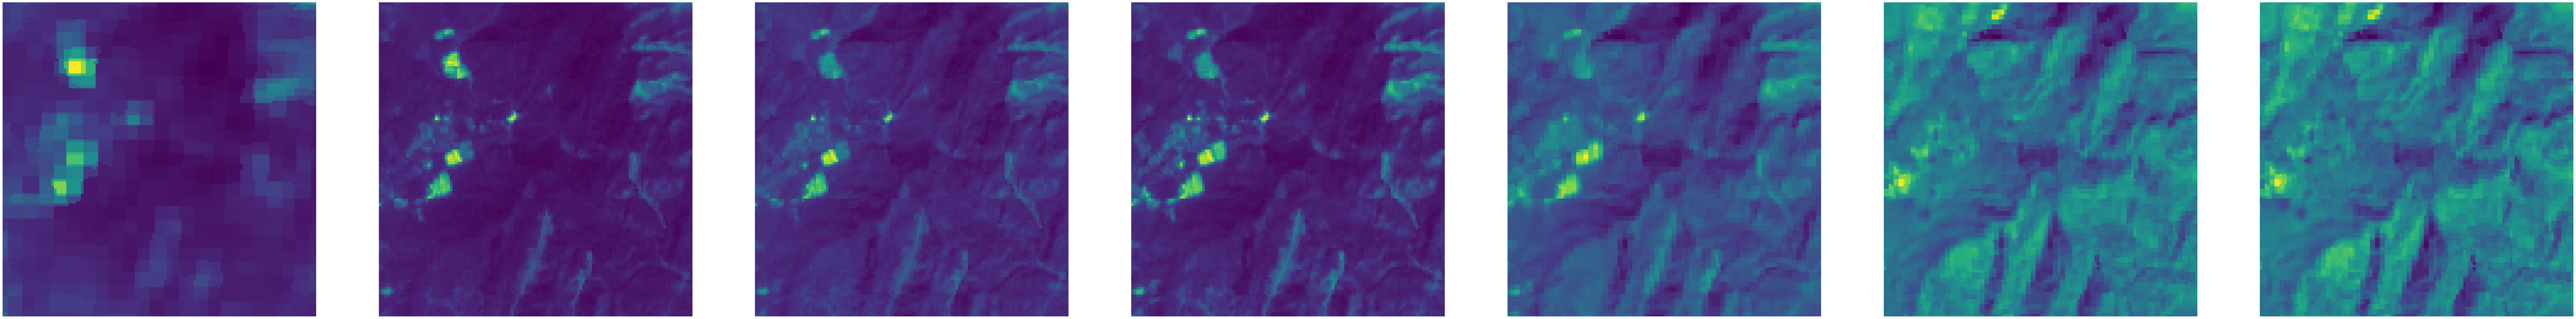

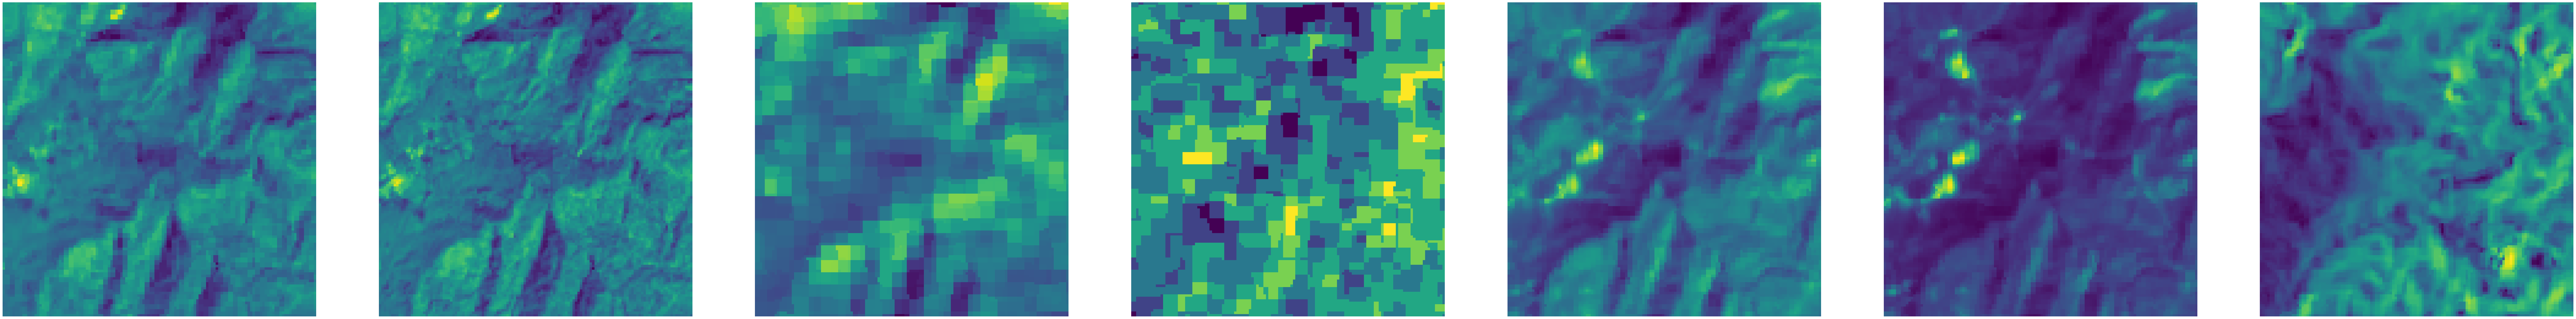

Mask:


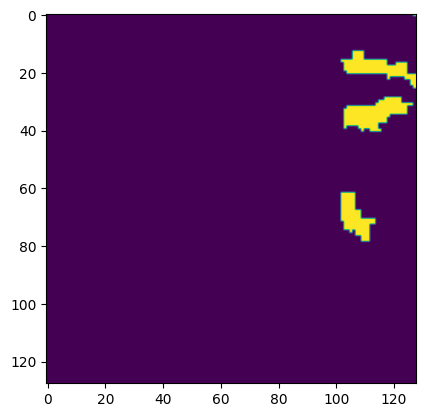

In [59]:
fig, axs = plt.subplots(1, 7, figsize=(128, 128), sharey=True, sharex=True)
print("First Image:")
for j in range(7):
    axs[j].imshow(np.squeeze(img_list[0,:,:,j]), )#cmap='gray')
    axs[j].axis('off')
plt.show()
fig, axs = plt.subplots(1, 7, figsize=(128, 128), sharey=True, sharex=True)
for j in range(7):
    axs[j].imshow(np.squeeze(img_list[0,:,:,j+6]), )#cmap='gray')
    axs[j].axis('off')
plt.show()
print("Mask:")
plt.imshow(mask_list[0])
plt.show()

Second Image:


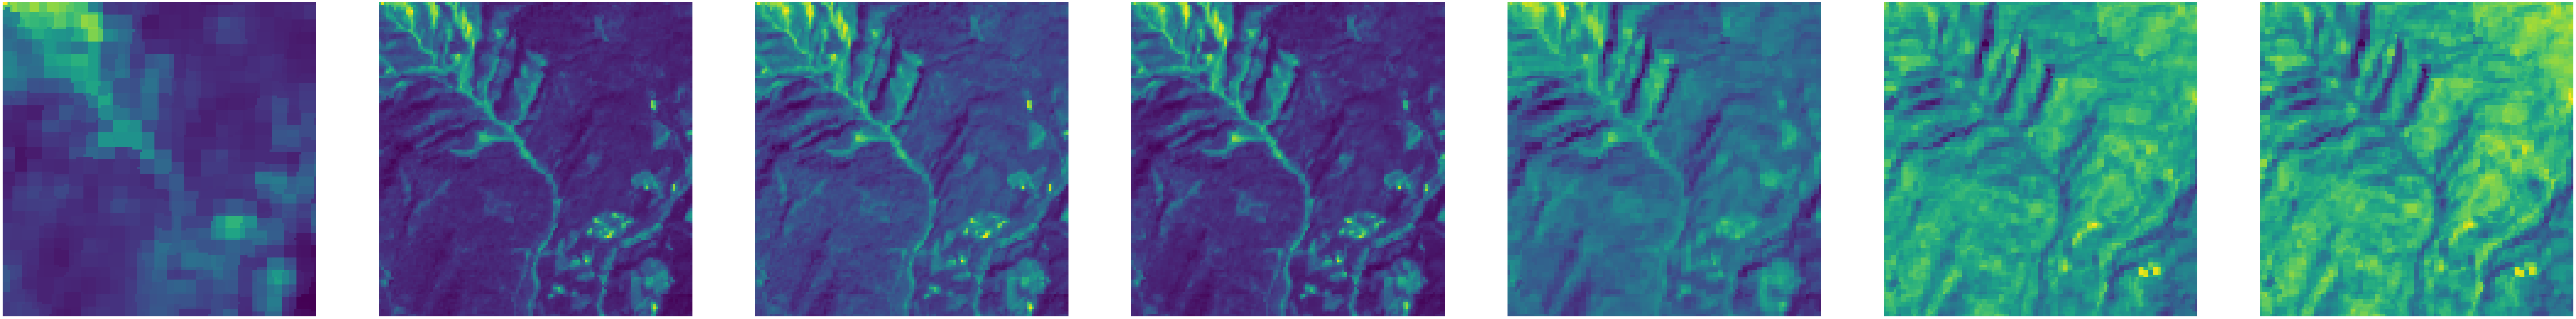

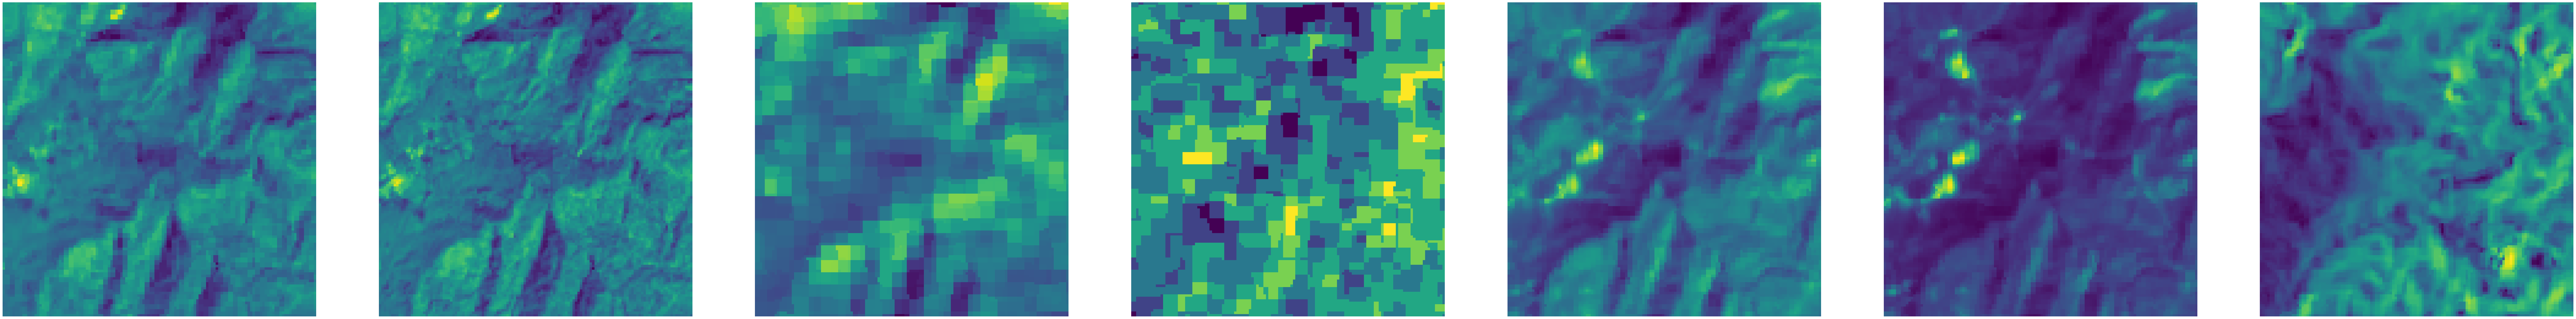

Mask:


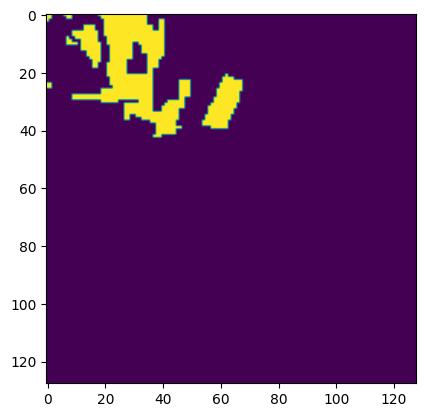

In [60]:
fig, axs = plt.subplots(1, 7, figsize=(128, 128), sharey=True, sharex=True)
print("Second Image:")
for j in range(7):
    axs[j].imshow(np.squeeze(img_list[1,:,:,j]), )#cmap='gray')
    axs[j].axis('off')
plt.show()
fig, axs = plt.subplots(1, 7, figsize=(128, 128), sharey=True, sharex=True)
for j in range(7):
    axs[j].imshow(np.squeeze(img_list[0,:,:,j+6]), )#cmap='gray')
    axs[j].axis('off')
plt.show()
print("Mask:")
plt.imshow(mask_list[1])
plt.show()

_The highest difference appears in band 4 and band 5. Sentinel-2 sensors contain three bands in the “red edge” wavelength range–band 5, band 6, and band 7–which are important for vegetation related studies and agriculture applications. Figure 7 shows that the first red edge band of band 5 has a higher difference between the considered categories than band 6 and band 7. Moreover, the short-wave infrared wavelength from 1375 nm to 2190 nm (band 10, band 11, and band 12) represents a high mean pixel value for both categories with a high difference in band 12, which is more obvious in the Rasuwa District of Bagmati. Therefore, visible and near-infrared bands (band 6, band 7, and band 8) illustrate the lowest difference between landslide and non-landslide; these features share almost the same mean pixel values. As mentioned above, band 13 and band 14 refer to the slope and elevation data._

First Image:


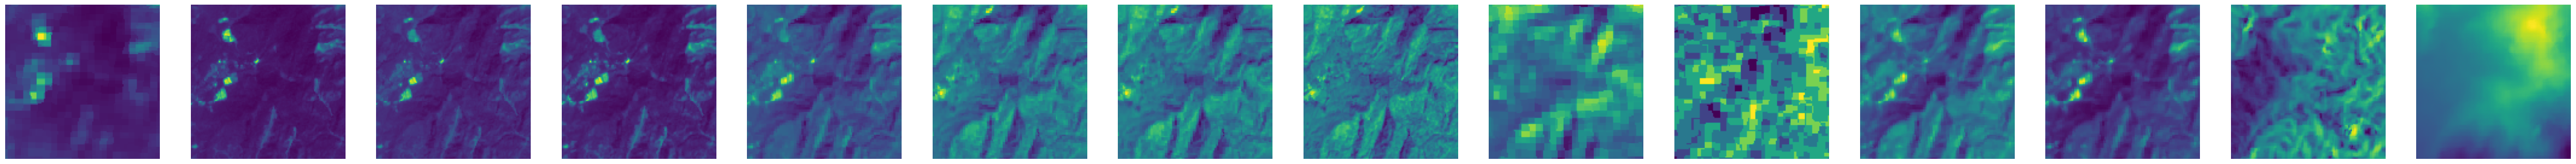

Mask:


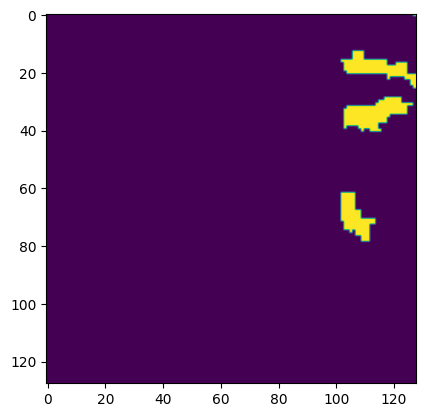

In [35]:
fig, axs = plt.subplots(1, 14, figsize=(64, 64), sharey=True, sharex=True)
print("First Image:")
for j in range(14):
    axs[j].imshow(np.squeeze(img_list[0,:,:,j]), )#cmap='gray')
    axs[j].axis('off')
plt.show()
print("Mask:")
plt.imshow(mask_list[0])
plt.show()

Second Image:


Mask:


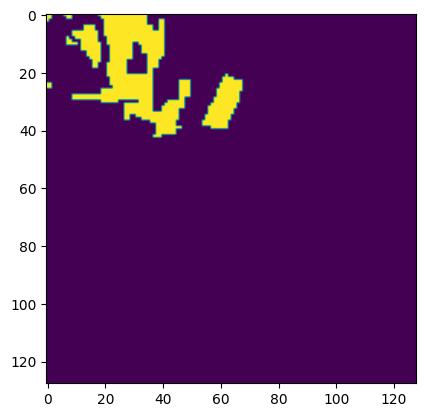

In [56]:
fig, axs = plt.subplots(2, 7, figsize=(128, 128), sharey=True, sharex=True)
print("Second Image:")

for i in range(2):
    for j in range(7):
        axs[i,j].imshow(img_list[1,:,:,i*2+j])#cmap='gray')
        axs[i,j].axis('off')
plt.show()
print("Mask:")
plt.imshow(mask_list[1])
plt.show()